# Package Calling

In [64]:
import sys
from platform import python_version

sys.path.append("../../")
print(python_version(), sys.version, sep="\n")

3.7.12
3.7.12 (default, Nov 21 2022, 11:33:11) 
[Clang 12.0.0 (clang-1200.0.32.29)]


In [2]:
import datetime as dtt
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Package Settings

In [4]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [5]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("chained_assignment", None)

In [6]:
plt.rcParams["font.family"] = ["Arial Unicode MS"]  # Chinese Labels
plt.rcParams["axes.unicode_minus"] = False  # Minus Sign
plt.rcParams["figure.max_open_warning"] = 0

sns.set(
    style="darkgrid",
    rc={
        "figure.figsize": (12, 6),
        "font.sans-serif": ["Arial Unicode MS", "Arial"],
    },
)

## GC Settings

In [7]:
import gc

gc.isenabled()
gc.get_threshold()

True

(700, 10, 10)

In [8]:
# gc.set_threshold(10,1,1)
# gc.enable()
# gc.disable()

# Modeling

In [9]:
data_path = "/Users/chenzhou/Documents/Everything/python/COVID19/data/data_0516_SH.csv"
data_sh = pd.read_csv(
    data_path,
    dtype={
        "inbound_confirmed": int,
        "inbound_asymp": int,
        "outbound_confirmed": int,
        "outbound_asymp": int,
        "cure": int,
        "relieve": int,
    },
    parse_dates=["date"],
)

In [10]:
data_sh["confirmed_add"] = data_sh.inbound_confirmed + data_sh.outbound_confirmed
data_sh["asymp_add"] = data_sh.inbound_asymp + data_sh.outbound_asymp
data_sh["total_add"] = data_sh.confirmed_add + data_sh.asymp_add

data_sh["confirmed_acc"] = data_sh.confirmed_add.cumsum() - 380
data_sh["asymp_acc"] = data_sh.asymp_add.cumsum() - 120
data_sh["total_affected"] = data_sh.confirmed_acc + data_sh.asymp_acc

data_sh = data_sh.loc[data_sh.date >= "2022-03-01"].reset_index(drop=True)

In [11]:
data_sh

,inbound_confirmed,inbound_asymp,outbound_confirmed,outbound_asymp,date,cure,relieve,confirmed_add,asymp_add,total_add,confirmed_acc,asymp_acc,total_affected
0,1,1,37,17,2022-03-01,8,1,38,18,56,95,5,100
1,3,5,39,19,2022-03-02,8,2,42,24,66,137,29,166
2,2,14,43,21,2022-03-03,9,1,45,35,80,182,64,246
3,3,16,24,10,2022-03-04,12,0,27,26,53,209,90,299
4,0,28,25,10,2022-03-05,8,4,25,38,63,234,128,362
5,3,45,32,16,2022-03-06,65,16,35,61,96,269,189,458
6,4,51,36,10,2022-03-07,27,10,40,61,101,309,250,559
7,3,62,26,10,2022-03-08,32,7,29,72,101,338,322,660
8,4,76,42,16,2022-03-09,18,13,46,92,138,384,414,798
9,11,64,32,10,2022-03-10,17,7,43,74,117,427,488,915


## Optimize BS Pars Locally

In [12]:
from covid19 import (
    bs_coeff_local_opt,
    covid19_seer,
    growth_decision,
    model_theta_global_opt,
    next_pred,
    pred_ser,
    revise_ser,
)

In [13]:
bs_interp_prop = 0.5
interg_interp_prop = 500.0
ser = data_sh.total_affected.iloc[28:].values
kappa, mu, tau = 0.6, 1.0, 1.8

In [14]:
labd, lr, decay, iters, early_stop_ratio, early_stop_steps, show_process = (
    5.0,
    0.02,
    0.999,
    int(4e2),
    [1.1, 0.999],
    3,
    True,
)

(array([-0.00446955, -0.02432212, -0.03494476]),
 68058.29120741376,
 array([ 15376.31169674,  21397.46164228,  29452.87244041,  38484.56721497,
         48816.4146564 ,  61039.11971463,  75428.88681095,  92125.7471299 ,
        111039.53943756, 131982.09287213, 154603.39047879, 178505.95167099,
        203264.2874284 , 228455.482859  , 253694.92801782, 278628.26564876,
        302983.84430399, 326546.91527311, 349247.63498685, 371075.28348042,
        392110.73006575, 412466.8503139 , 432292.95555588, 451682.5675312 ,
        470469.61385363, 488395.12155845, 505088.10949306, 520210.83140963,
        533670.48886754, 545470.40741557, 555753.4607531 , 564694.50198214,
        572456.7536646 , 579201.4289486 , 585093.33386703, 590290.15717353,
        594917.52561976, 599079.21563602, 602823.66436898, 606175.28633889,
        609117.7448439 , 611638.92453552, 613784.34670082, 615617.39810663,
        617215.29080334, 618657.11470465, 620015.64589403, 621362.74765928,
        622772.9459

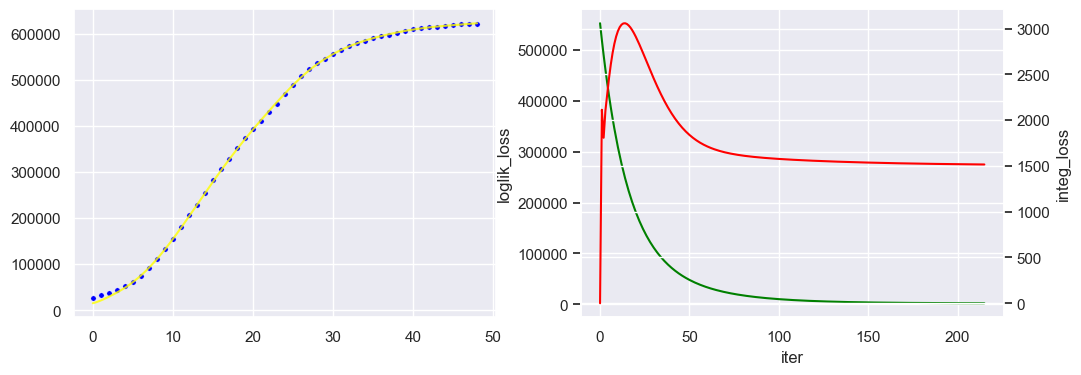

In [15]:
bs_coeff_local_opt(
    ser,
    kappa,
    mu,
    tau,
    bs_interp_prop,
    interg_interp_prop,
    labd,
    lr,
    decay,
    iters,
    early_stop_ratio,
    early_stop_steps,
    show_process,
    ser_loss_expansion=0.5,
)

## Optimize Theta Globally

In [16]:
kappa_init, mu_init, tau_init = 0.59, 1.0, 1.81

inter 0: Theta: [0.59060356 1.00278527 1.81354436] Loss: 63562.973801590124
inter 1: Theta: [0.59082545 1.00629384 1.81727524] Loss: 49748.02322857234
inter 2: Theta: [0.59082234 1.00956819 1.82130934] Loss: 61356.10147972504


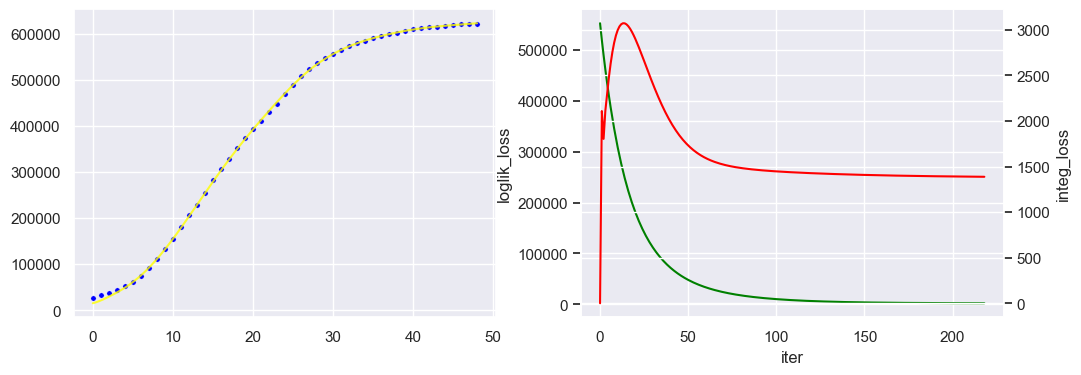

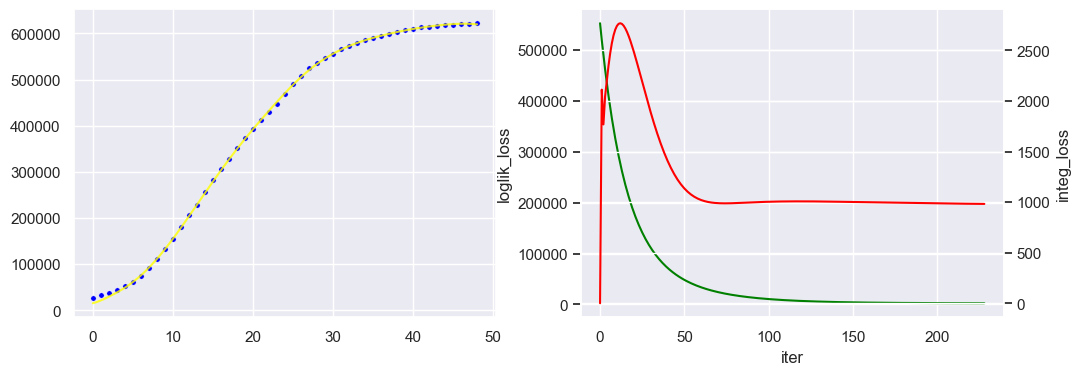

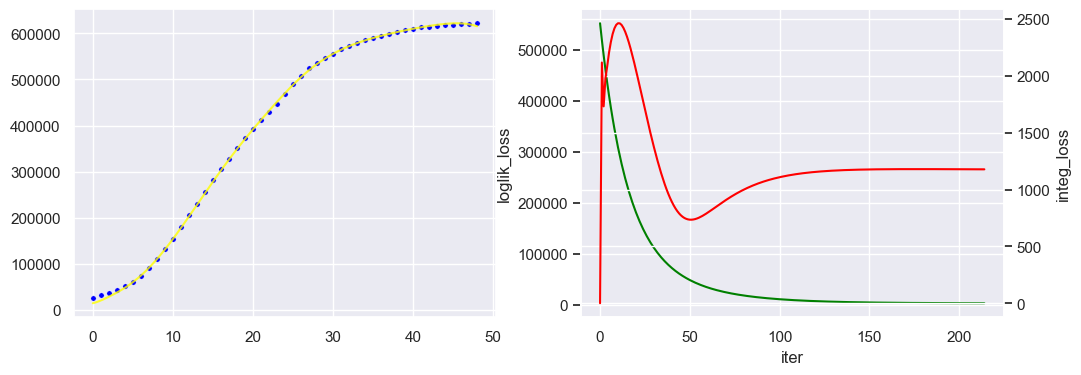

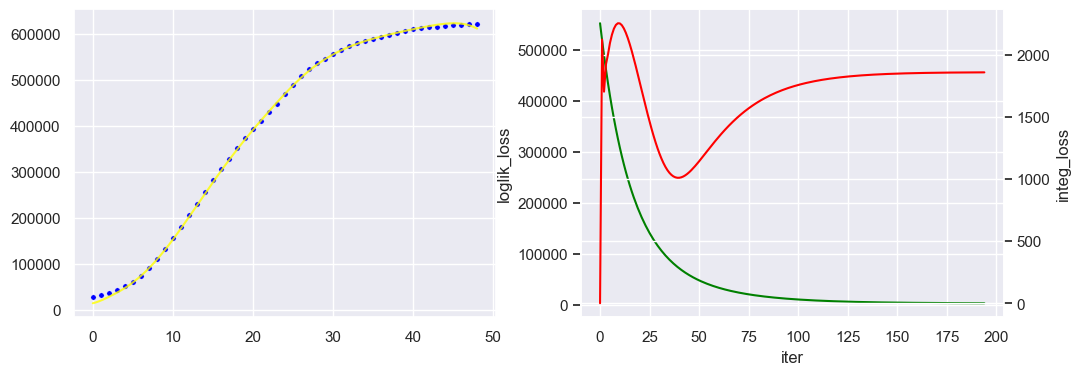

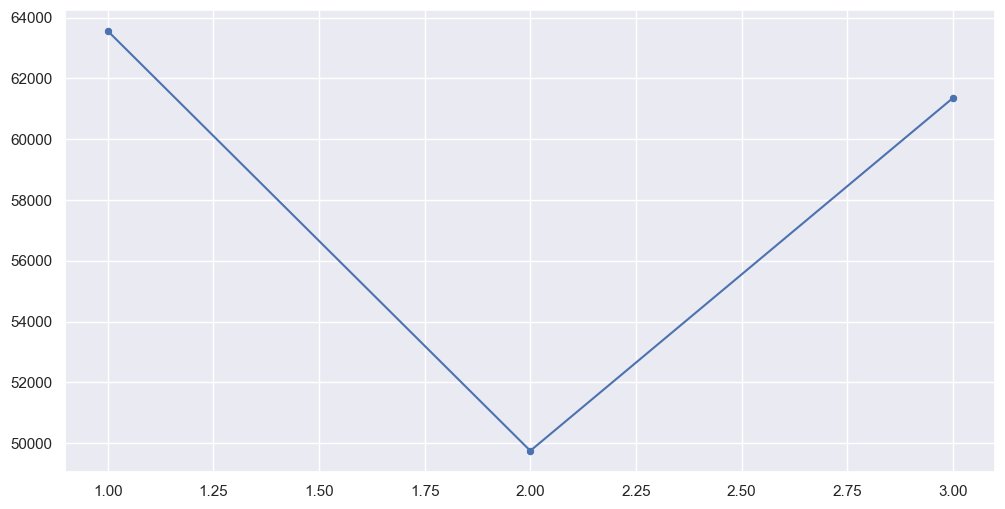

In [17]:
ser = data_sh.total_affected.iloc[28:].values

theta_opt, losses, fitted_opt, bs_funcs = model_theta_global_opt(
    ser,
    kappa_init=kappa_init,
    mu_init=mu_init,
    tau_init=tau_init,
    bs_interp_prop=0.5,
    interg_interp_prop=500.0,
    labd=5.0,
    bs_lr_schedule=(int(4e2), 0.02, 0.999),
    theta_lr_schedule=(int(2e2), 0.1, 0.99),
    early_stop_ratio=[1.5, 0.999],
    early_stop_steps=3,
    show_process="both",
)

<AxesSubplot:>

<AxesSubplot:>

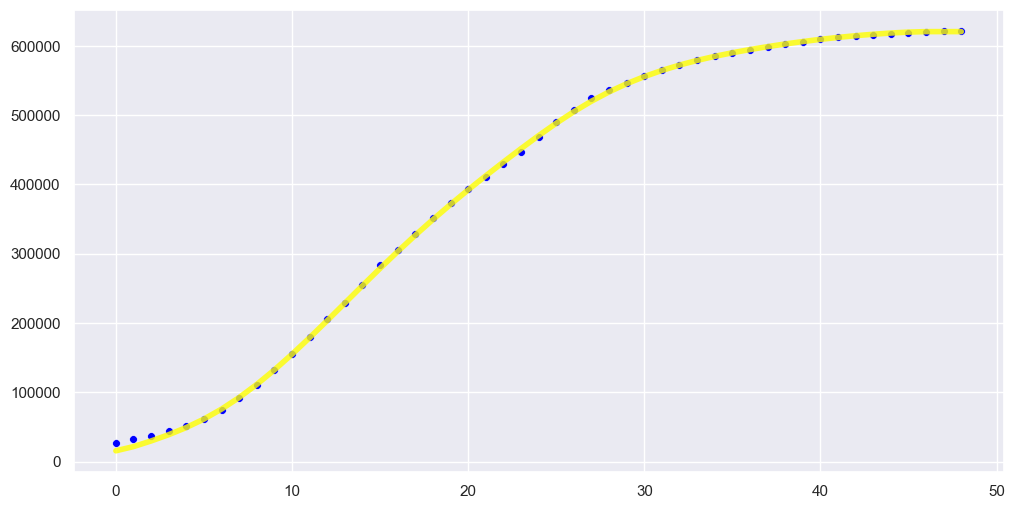

In [18]:
sns.scatterplot(x=range(len(ser)), y=ser, alpha=1.0, color="blue", s=32)
sns.lineplot(
    x=range(len(ser)), y=revise_ser(fitted_opt), alpha=0.8, color="yellow", linewidth=4
)

# Application on SZ

In [19]:
data_sz = pd.read_csv(
    "/Users/chenzhou/Documents/Everything/python/COVID19/data/covid19_shenzhen.csv",
    dtype={
        "week_group": int,
        "adt": int,
        "imputed_adt": float,
        "adt_prop": float,
        "store_cnt": int,
        "cfm_cases": pd.Int64Dtype(),
        "asym_cases": pd.Int64Dtype(),
        "covid_group": int,
    },
    parse_dates=["date"],
)
# data_sz.fillna(0, inplace=True)
data_sz["total_add"] = data_sz.cfm_cases + data_sz.asym_cases

In [20]:
data_modeling = data_sz.loc[
    # data_sz.week_group.isin(range(56, 78))
    data_sz.week_group.isin(range(126, 130))
    # data_sz.week_group.isin(range(162, 170))
]  # data_sz.covid_group.isin([2])
shifting = 0
data_modeling["total_affected"] = data_modeling.total_add.cumsum() + shifting

In [21]:
data_modeling

,date,week_group,adt,imputed_adt,adt_prop,store_cnt,cfm_cases,asym_cases,covid_group,total_add,total_affected
881,2021-05-31,126,9441,9441.000,1.000,226,0,2,-1,2,2
882,2021-06-01,126,9991,9991.000,1.000,226,0,0,-1,0,2
883,2021-06-02,126,9165,9165.000,1.000,226,3,1,-1,4,6
884,2021-06-03,126,9649,9649.000,1.000,226,0,0,-1,0,6
885,2021-06-04,126,11058,11058.000,1.000,226,0,0,-1,0,6
886,2021-06-05,126,11917,11917.000,1.000,220,0,0,-1,0,6
887,2021-06-06,126,11727,11727.000,1.000,212,1,1,-1,2,8
888,2021-06-07,127,8978,8978.000,1.000,226,1,0,-1,1,9
889,2021-06-08,127,9735,9735.000,1.000,226,0,3,-1,3,12
890,2021-06-09,127,9912,9912.000,1.000,226,0,1,-1,1,13


(array([-0.0355126 , -0.23166369,  0.27195619]),
 193.58465447499964,
 array([ 11.46697035,   8.9095676 ,   8.0548666 ,   8.45114584,
          9.65829649,  11.34406308,  13.59599096,  16.55827631,
         20.18191784,  24.28364284,  28.33629043,  31.86267022,
         34.929362  ,  37.70744541,  40.24222926,  42.69557519,
         45.82132691,  50.82958958,  60.16353221,  77.10612692,
        107.06649457]),
 (array([ 11.46697035,   9.09344023,   7.22281522,   9.40918599,
          13.09021974,  19.80588082,  28.77776399,  35.10080578,
          40.39518489,  44.77183024,  55.44545561,  81.43351226,
         107.06649457]),
  BSpline(domain_range=((0, 20),), n_basis=13, order=4, knots=(0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0))))

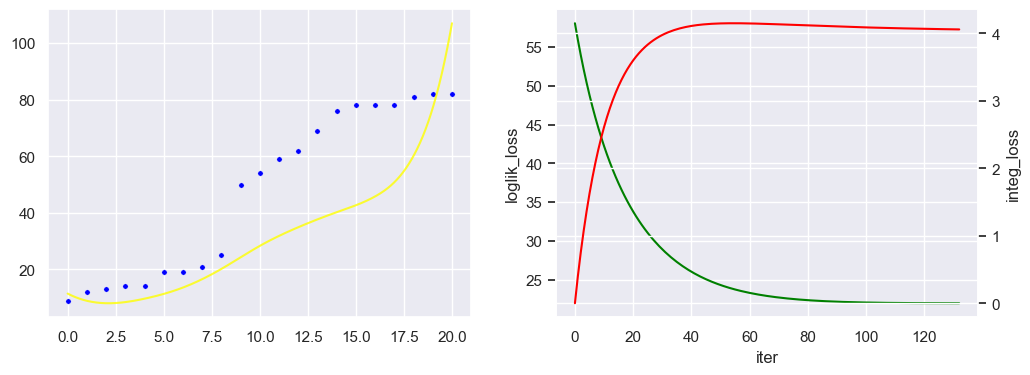

In [22]:
ser = np.concatenate([[0] * 0, data_modeling.total_affected.iloc[7:].values])
kappa_init, mu_init, tau_init = 0.72, 0.76, 1.43

bs_coeff_local_opt(
    ser,
    kappa=kappa_init,
    mu=mu_init,
    tau=tau_init,
    bs_interp_prop=0.5,
    interg_interp_prop=200.0,
    labd=5.0,
    lr=0.02,
    decay=0.999,
    iters=int(4e2),
    early_stop_ratio=[1.2, 0.9999],
    early_stop_steps=3,
    show_process=True,
    ser_loss_expansion=0.1,
)

In [23]:
theta_opt

array([0.59060356, 1.00278527, 1.81354436])

inter 0: Theta: [0.5998513  1.01969601 1.64097704] Loss: 27.142998129753654
inter 1: Theta: [0.59971494 1.01941855 1.64185552] Loss: 27.06590914061572
inter 2: Theta: [0.59959013 1.01916563 1.64264543] Loss: 26.998104962639886
inter 3: Theta: [0.59947374 1.01894096 1.64335551] Loss: 26.752393623132406
inter 4: Theta: [0.59936769 1.01873673 1.64399408] Loss: 26.70405793171164
inter 5: Theta: [0.59927119 1.01855126 1.64456836] Loss: 26.6615535074657
inter 6: Theta: [0.59918349 1.01838298 1.64508486] Loss: 26.62414466303232
inter 7: Theta: [0.59910387 1.01823043 1.64554942] Loss: 26.591189171731784
inter 8: Theta: [0.59903164 1.01809225 1.64596728] Loss: 26.562127275513333
inter 9: Theta: [0.59896618 1.01796716 1.64634315] Loss: 26.53647164164298
inter 10: Theta: [0.59890689 1.01785399 1.64668128] Loss: 26.51379828862369
inter 11: Theta: [0.59885323 1.01775167 1.64698546] Loss: 26.493738466887923
inter 12: Theta: [0.59880469 1.01765919 1.6472591 ] Loss: 26.475971453755875
inter 13: Theta:

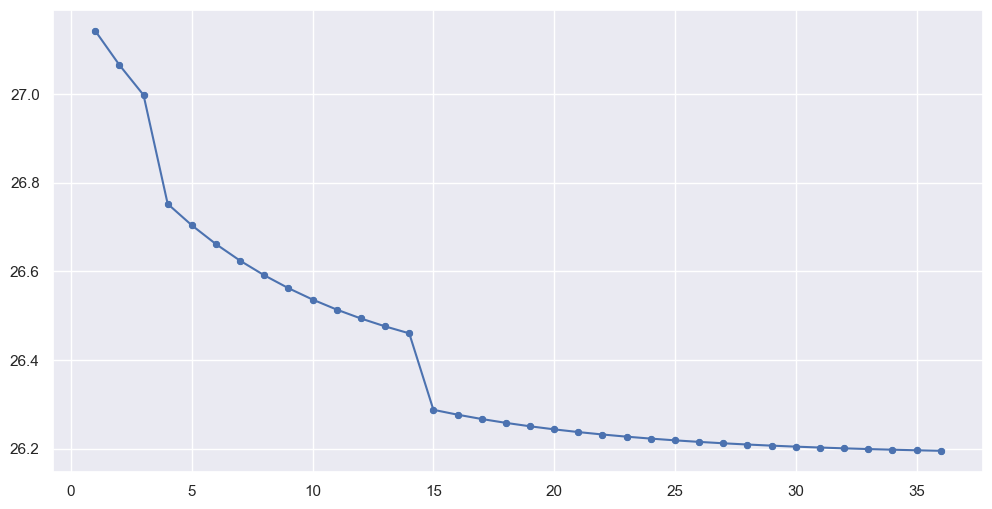

In [24]:
# 2020 56 + 4w 0.5794437  1.0217819  1.60897016
# 2021 127 + 3w 0.60308749, 1.02070991, 1.72955825
# 2022 163 + 7w 0.61065746, 1.02502465, 1.57269699

kappa_init, mu_init, tau_init = 0.60, 1.02, 1.64

theta_opt, losses, fitted_opt, bs_funcs = model_theta_global_opt(
    ser,
    kappa_init=kappa_init,
    mu_init=mu_init,
    tau_init=tau_init,
    bs_interp_prop=0.5,
    interg_interp_prop=200.0,
    labd=5.0,
    bs_lr_schedule=(int(4e2), 0.02, 0.999),
    theta_lr_schedule=(int(5e2), 0.01, 0.9),
    early_stop_ratio=[2.0, 0.999],
    early_stop_steps=20,
    show_process="outer",
    ser_loss_expansion=0.5,
)

<AxesSubplot:>

<AxesSubplot:>

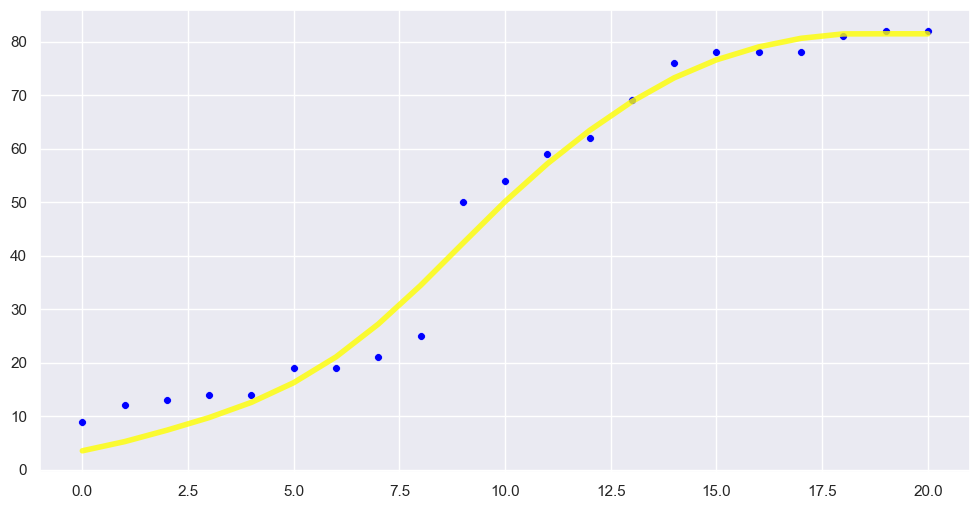

In [25]:
sns.scatterplot(x=range(len(ser)), y=ser, alpha=1.0, color="blue", s=32)
sns.lineplot(
    x=range(len(ser)), y=revise_ser(fitted_opt), alpha=0.8, color="yellow", linewidth=4
)

## Prediction

In [26]:
pred_len = 30
pred_interp = 10
pred_prev_len = 2
fitted_ser = revise_ser(fitted_opt)
pred_ser_combo = pred_ser(fitted_ser, pred_len, pred_interp, pred_prev_len, theta_opt)
pred_series = pred_ser_combo[pred_interp * pred_prev_len :][::pred_interp]
pred_series = revise_ser(pred_series, intercept=pred_series[0])

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

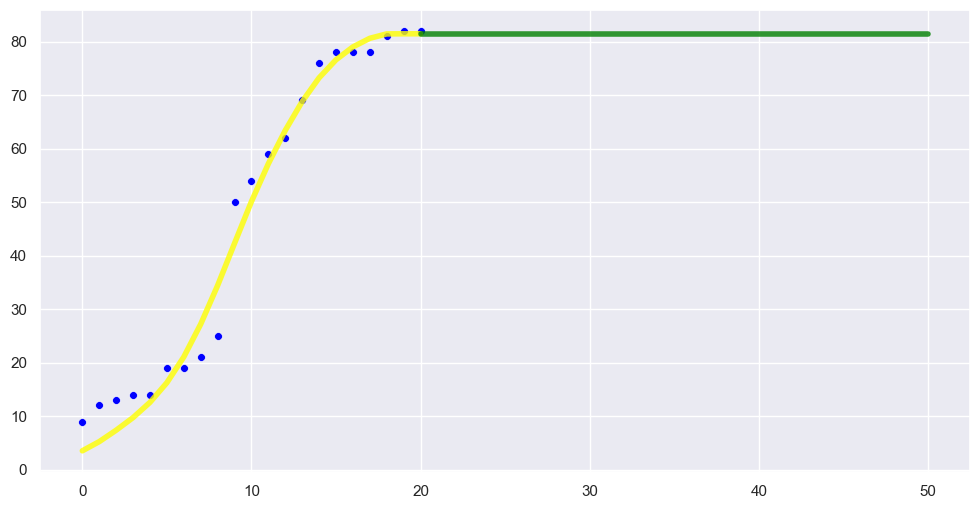

In [27]:
sns.scatterplot(x=range(len(fitted_ser)), y=ser, alpha=1.0, color="blue", s=32)
sns.lineplot(
    x=range(len(fitted_ser)), y=fitted_ser, alpha=0.8, color="yellow", linewidth=4
)
sns.lineplot(
    x=range(len(fitted_ser) - 1, len(fitted_ser) + pred_len),
    y=pred_series,
    alpha=0.8,
    color="green",
    linewidth=4,
)

In [28]:
growth_decision(fitted_ser, theta_opt)

False

## Integration

In [29]:
theta_city = 0.60, 1.02, 1.64

<AxesSubplot:>

<AxesSubplot:>

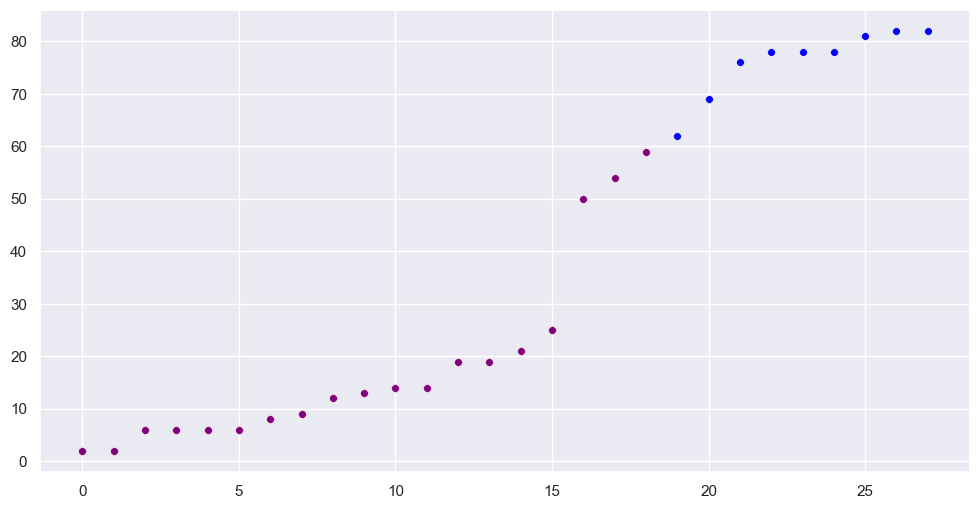

In [30]:
gt = data_modeling.total_affected.iloc[:].values
ser = gt[:19]
sns.scatterplot(x=range(len(gt)), y=gt, alpha=1.0, color="blue", s=32)
sns.scatterplot(x=range(len(ser)), y=ser, alpha=0.5, color="red", s=32)

In [31]:
growth_flag, turning_point, stop_point, seer_ser = covid19_seer(
    ser, "LOCKDOWN", theta_city
)

fitted theta: [0.55611965 0.96885287 1.88288599]
None


In [32]:
growth_flag, turning_point, stop_point, seer_ser

(True,
 None,
 24,
 array([2, 2, 6, 6, 6, 6, 8, 9, 12, 13, 14, 14, 19, 19, 21, 25, 50, 54, 59,
        62.74920312648171, 65.68417661617977, 67.6652059183652,
        68.65060184404815, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.7647859653682, 68.7647859653682,
        68.7647859653682, 68.76478

<AxesSubplot:>

<AxesSubplot:>

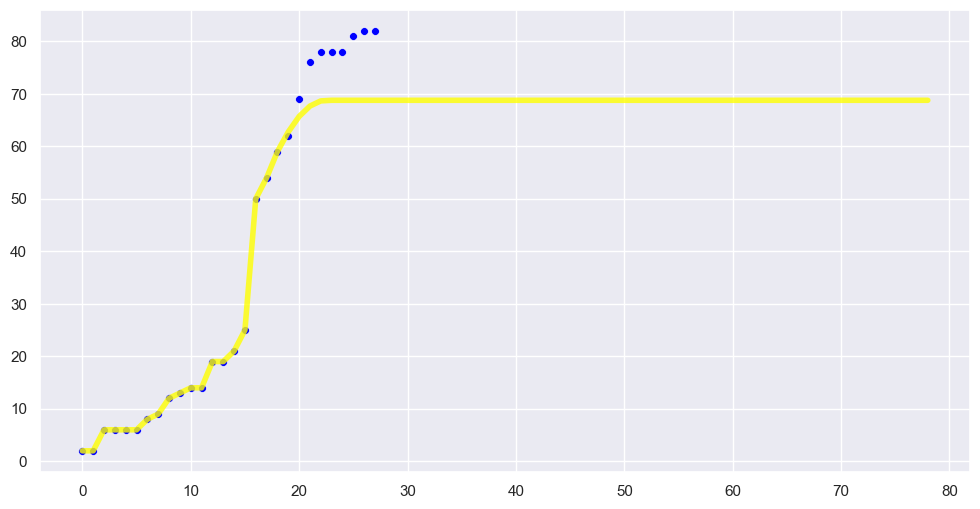

In [33]:
sns.scatterplot(x=range(len(gt)), y=gt, alpha=1.0, color="blue", s=32)
sns.lineplot(x=range(len(seer_ser)), y=seer_ser, alpha=0.8, color="yellow", linewidth=4)

## Yearly Covid19

### 2020

#### Lockdown

In [34]:
data_modeling = (
    data_sz.loc[
        data_sz.week_group.isin(range(56, 60))
        # data_sz.week_group.isin(range(126, 130))
        # data_sz.week_group.isin(range(162, 170))
    ]
    .sort_values(["date"])
    .reset_index(drop=True)
)
shifting = 0
data_modeling.fillna(0.0, inplace=True)
data_modeling["total_affected"] = data_modeling.total_add.cumsum() + shifting
data_modeling

,date,week_group,adt,imputed_adt,adt_prop,store_cnt,cfm_cases,asym_cases,covid_group,total_add,total_affected
0,2020-01-27,56,3360,8611.495,0.390,96,9,0,0,9,9
1,2020-01-28,56,2213,8895.583,0.249,58,13,0,0,13,22
2,2020-01-29,56,2071,9035.365,0.229,54,14,0,0,14,36
3,2020-01-30,56,1885,9078.519,0.208,54,23,0,0,23,59
4,2020-01-31,56,1642,10263.707,0.160,55,24,0,0,24,83
5,2020-02-01,56,1489,11113.758,0.134,54,60,0,0,60,143
6,2020-02-02,56,1372,10783.147,0.127,51,26,0,0,26,169
7,2020-02-03,57,1337,8670.742,0.154,52,30,0,0,30,199
8,2020-02-04,57,1143,8937.928,0.128,49,43,0,0,43,242
9,2020-02-05,57,1048,9055.887,0.116,49,20,0,0,20,262


<AxesSubplot:xlabel='date', ylabel='total_affected'>

<AxesSubplot:xlabel='date', ylabel='total_affected'>

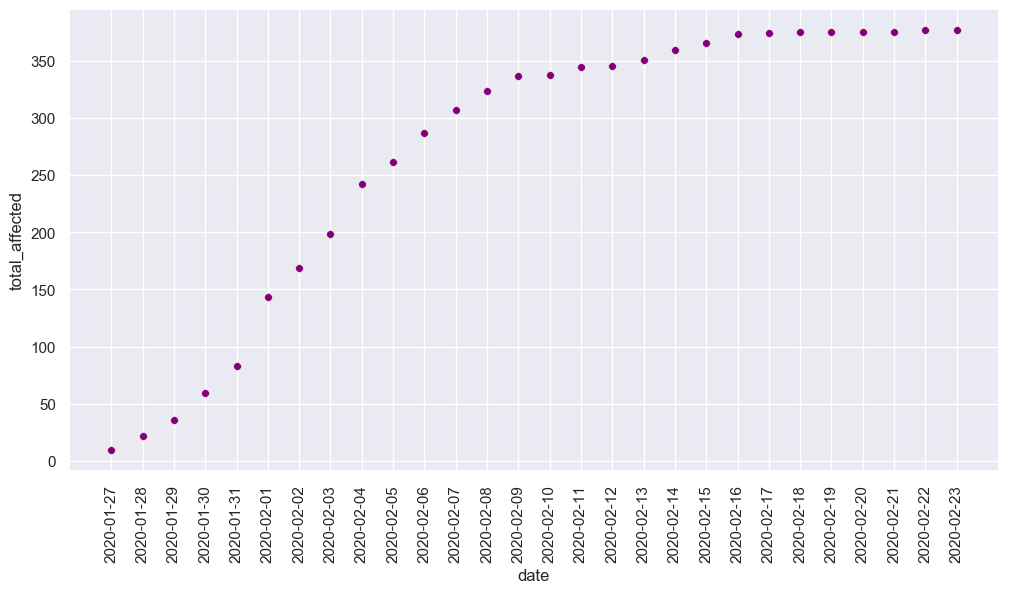

In [35]:
gt = data_modeling.iloc[:]
ser = gt.iloc[:]
sns.scatterplot(x=gt.date, y=gt.total_affected, alpha=1.0, color="blue", s=32)
sns.scatterplot(x=ser.date, y=ser.total_affected, alpha=0.5, color="red", s=32)
_ = plt.xticks(gt.date, rotation=90)

In [36]:
lock_down_pred_list = []
for _pred_date in data_modeling.date.iloc[3:-7]:
    growth_flag, turning_point, stop_point, seer_ser = covid19_seer(
        data_modeling.loc[data_modeling.date <= _pred_date].total_affected.values,
        "LOCKDOWN",
        theta_city,
        five_day_filter=10,
    )
    if stop_point is not None:
        lock_down_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(stop_point)),
                1,
            ]
        )
    else:
        stop_point = 5
    for _p in range(stop_point):
        lock_down_pred_list.append(
            [_pred_date, data_modeling.date.iloc[0] + dtt.timedelta(days=int(_p)), 0]
        )

fitted theta: [0.60107421 0.47131498 1.67165805]
None
fitted theta: [0.6011817  0.74711134 1.67380798]
None
fitted theta: [0.60670488 0.61176869 1.89577206]
None
fitted theta: [0.60359832 0.86488773 1.75178833]
None
fitted theta: [0.60292199 0.95687612 1.70486455]
None
fitted theta: [0.60312868 0.96877651 1.70081834]
None
fitted theta: [0.60190997 0.99663524 1.67622468]
None
fitted theta: [0.60635273 1.01678576 1.72202782]
None
fitted theta: [0.60910926 1.03333378 1.73215203]
None
fitted theta: [0.60791516 1.03254329 1.72780475]
None
fitted theta: [0.60482211 1.03148231 1.73762241]
None
fitted theta: [0.59610267 1.03261193 1.76280553]
None
fitted theta: [0.58247555 1.03309244 1.80277911]
None
fitted theta: [0.57600358 1.03039662 1.79273904]
None
fitted theta: [0.59593336 1.02131721 1.66288198]
None
fitted theta: [0.6  1.02 1.64]
None
fitted theta: [0.6  1.02 1.64]
None
fitted theta: [0.6  1.02 1.64]
None


<AxesSubplot:xlabel='zero_date', ylabel='pred_date'>

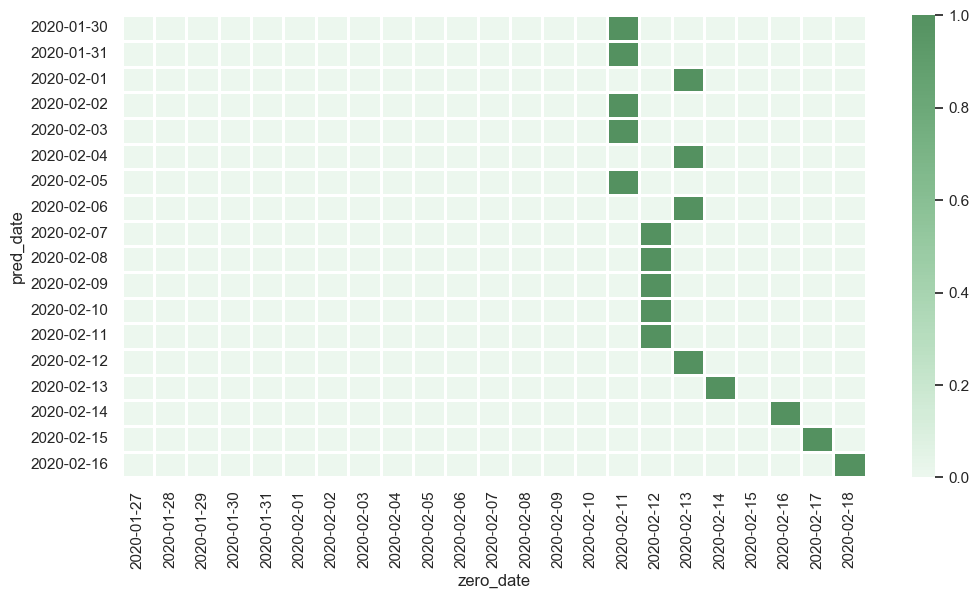

In [37]:
heat_map_df = pd.DataFrame(
    lock_down_pred_list, columns=["pred_date", "zero_date", "flag"]
)
heat_map_df["pred_date"] = heat_map_df["pred_date"].dt.date
heat_map_df["zero_date"] = heat_map_df["zero_date"].dt.date

sns.heatmap(
    pd.pivot_table(
        heat_map_df,
        index="pred_date",
        columns="zero_date",
        values="flag",
        fill_value=0,
        aggfunc="max",
    ),
    cmap=sns.cubehelix_palette(
        start=2, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True
    ),
    center=1.0,
    linewidths=1,
)

### 2021

#### Warning

In [38]:
data_modeling = (
    data_sz.loc[
        # data_sz.week_group.isin(range(56, 60))
        data_sz.week_group.isin(range(127, 131))
        # data_sz.week_group.isin(range(162, 170))
    ]
    .sort_values(["date"])
    .reset_index(drop=True)
)
shifting = 0
data_modeling.fillna(0.0, inplace=True)
data_modeling["total_affected"] = data_modeling.total_add.cumsum() + shifting
data_modeling

,date,week_group,adt,imputed_adt,adt_prop,store_cnt,cfm_cases,asym_cases,covid_group,total_add,total_affected
0,2021-06-07,127,8978,8978.000,1.000,226,1,0,-1,1,1
1,2021-06-08,127,9735,9735.000,1.000,226,0,3,-1,3,4
2,2021-06-09,127,9912,9912.000,1.000,226,0,1,-1,1,5
3,2021-06-10,127,9844,9844.000,1.000,226,0,1,-1,1,6
4,2021-06-11,127,12712,12712.000,1.000,227,0,0,-1,0,6
5,2021-06-12,127,12728,12728.000,1.000,220,1,4,-1,5,11
6,2021-06-13,127,12338,12338.000,1.000,212,0,0,-1,0,11
7,2021-06-14,128,10436,10436.000,1.000,199,1,1,1,2,13
8,2021-06-15,128,8997,8997.000,1.000,227,3,1,1,4,17
9,2021-06-16,128,9900,9900.000,1.000,225,13,12,1,25,42


<AxesSubplot:xlabel='date', ylabel='total_affected'>

<AxesSubplot:xlabel='date', ylabel='total_affected'>

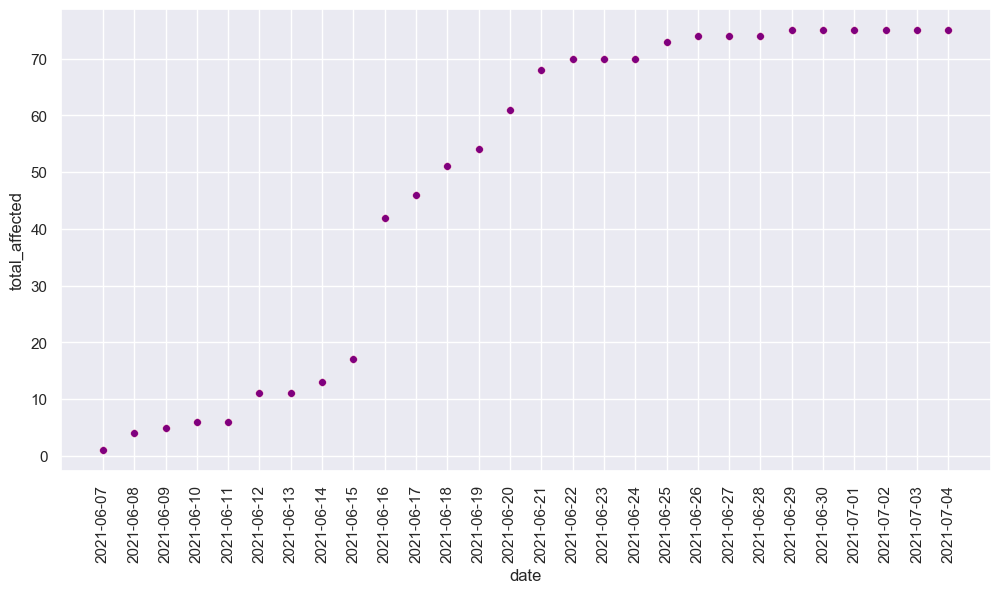

In [39]:
gt = data_modeling.iloc[:]
ser = gt.iloc[:]
sns.scatterplot(x=gt.date, y=gt.total_affected, alpha=1.0, color="blue", s=32)
sns.scatterplot(x=ser.date, y=ser.total_affected, alpha=0.5, color="red", s=32)
_ = plt.xticks(gt.date, rotation=90)

In [40]:
warning_pred_list = []
for _pred_date in data_modeling.date.iloc[3:-7]:
    print(_pred_date)
    growth_flag, turning_point, stop_point, seer_ser = covid19_seer(
        data_modeling.loc[data_modeling.date <= _pred_date].total_affected.values,
        "WARNING",
        theta_city,
        five_day_filter=15,
    )
    if turning_point is not None:
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(turning_point)),
                2,
            ]
        )
    else:
        turning_point = 5
    for _p in range(turning_point):
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(_p)),
                0,
            ]
        )

    if stop_point is not None:
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(stop_point)),
                1,
            ]
        )
    else:
        stop_point = 5
    for _p in range(stop_point):
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(_p)),
                0,
            ]
        )

2021-06-10 00:00:00
2021-06-11 00:00:00
2021-06-12 00:00:00
2021-06-13 00:00:00
2021-06-14 00:00:00
2021-06-15 00:00:00
2021-06-16 00:00:00
fitted theta: [0.61848379 0.75680536 2.37852895]
10
2021-06-17 00:00:00
fitted theta: [0.60245707 0.82840417 1.92860314]
11
2021-06-18 00:00:00
fitted theta: [0.57964896 0.86501911 1.79987367]
12
2021-06-19 00:00:00
fitted theta: [0.56854717 0.95314615 1.68160391]
13
2021-06-20 00:00:00
fitted theta: [0.58091853 0.97952169 1.65198373]
14
2021-06-21 00:00:00
fitted theta: [0.58521384 0.99063305 1.65387253]
15
2021-06-22 00:00:00
fitted theta: [0.59301108 1.00674392 1.64490924]
16
2021-06-23 00:00:00
fitted theta: [0.6  1.02 1.64]
17
2021-06-24 00:00:00
2021-06-25 00:00:00
2021-06-26 00:00:00
2021-06-27 00:00:00


<AxesSubplot:xlabel='zero_date', ylabel='pred_date'>

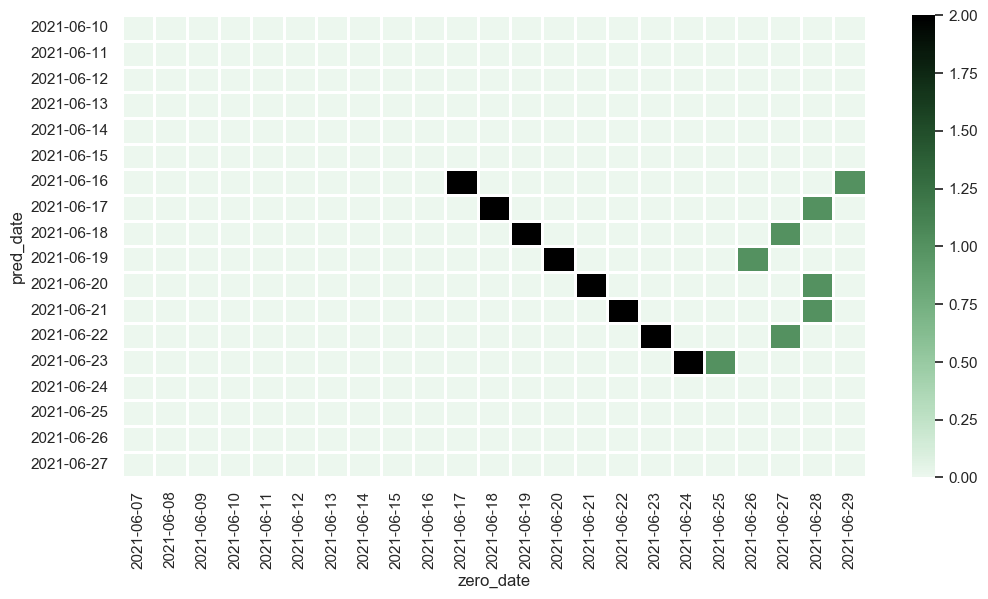

In [41]:
heat_map_df = pd.DataFrame(
    warning_pred_list, columns=["pred_date", "zero_date", "flag"]
)
heat_map_df["pred_date"] = heat_map_df["pred_date"].dt.date
heat_map_df["zero_date"] = heat_map_df["zero_date"].dt.date

sns.heatmap(
    pd.pivot_table(
        heat_map_df,
        index="pred_date",
        columns="zero_date",
        values="flag",
        aggfunc="max",
        fill_value=0,
    ),
    cmap=sns.cubehelix_palette(
        start=2, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True
    ),
    center=1.0,
    linewidths=1,
)

### 2022

#### Warning

In [42]:
data_modeling = (
    data_sz.loc[
        # data_sz.week_group.isin(range(56, 60))
        # data_sz.week_group.isin(range(127, 131))
        data_sz.week_group.isin(range(163, 170))
    ]
    .sort_values(["date"])
    .reset_index(drop=True)
)
shifting = 0
data_modeling.fillna(0.0, inplace=True)
data_modeling["total_affected"] = data_modeling.total_add.cumsum() + shifting
data_modeling

,date,week_group,adt,imputed_adt,adt_prop,store_cnt,cfm_cases,asym_cases,covid_group,total_add,total_affected
0,2022-02-14,163,10293,10293.000,1.000,246,1,0,-1,1,1
1,2022-02-15,163,8603,8603.000,1.000,246,2,0,-1,2,3
2,2022-02-16,163,8790,8790.000,1.000,246,3,0,-1,3,6
3,2022-02-17,163,7253,7253.000,1.000,246,6,2,-1,8,14
4,2022-02-18,163,8520,8520.000,1.000,245,3,0,-1,3,17
5,2022-02-19,163,6762,6762.000,1.000,242,3,0,-1,3,20
6,2022-02-20,163,6849,6849.000,1.000,232,8,0,-1,8,28
7,2022-02-21,164,6028,6028.000,1.000,250,6,1,-1,7,35
8,2022-02-22,164,6751,6751.000,1.000,251,3,0,-1,3,38
9,2022-02-23,164,7783,7783.000,1.000,249,7,1,-1,8,46


<AxesSubplot:xlabel='date', ylabel='total_affected'>

<AxesSubplot:xlabel='date', ylabel='total_affected'>

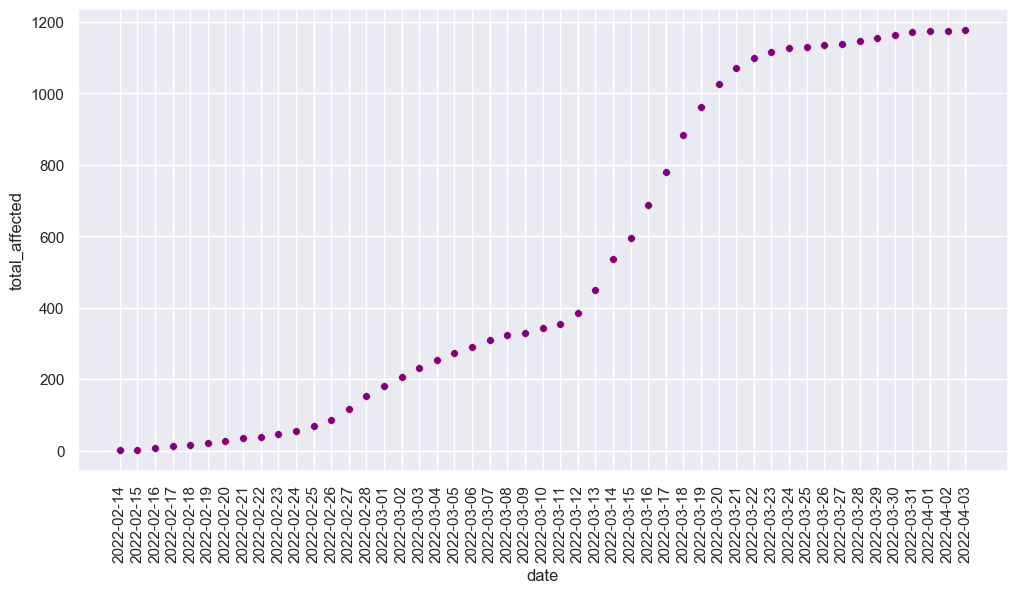

In [43]:
gt = data_modeling.iloc[:]
ser = gt.iloc[:]
sns.scatterplot(x=gt.date, y=gt.total_affected, alpha=1.0, color="blue", s=32)
sns.scatterplot(x=ser.date, y=ser.total_affected, alpha=0.5, color="red", s=32)
_ = plt.xticks(gt.date, rotation=90)

In [44]:
warning_pred_list = []
for _pred_date in data_modeling.date.iloc[3:28]:
    print(_pred_date)
    growth_flag, turning_point, stop_point, seer_ser = covid19_seer(
        data_modeling.loc[data_modeling.date <= _pred_date].total_affected.values,
        "WARNING",
        theta_city,
        five_day_filter=15,
        lock_down_hard_thresh=data_modeling.loc[
            data_modeling.date <= _pred_date
        ].total_affected.values.max()
        + 1,
    )
    if turning_point is not None:
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(turning_point)),
                2,
            ]
        )
    else:
        turning_point = 5
    for _p in range(turning_point):
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(_p)),
                0,
            ]
        )

    if stop_point is not None:
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(stop_point)),
                1,
            ]
        )
    else:
        stop_point = 5
    for _p in range(stop_point):
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(_p)),
                0,
            ]
        )

2022-02-17 00:00:00
fitted theta: [0.62521867 7.26909074 2.95960949]
4
2022-02-18 00:00:00
fitted theta: [0.60000889 0.98243805 1.64790068]
4
2022-02-19 00:00:00
fitted theta: [0.6  1.02 1.64]
5
2022-02-20 00:00:00
fitted theta: [0.60073282 0.92904682 1.66144883]
6
2022-02-21 00:00:00
fitted theta: [0.60262864 0.9317197  1.68620523]
7
2022-02-22 00:00:00
fitted theta: [0.60061625 0.97461819 1.66213531]
8
2022-02-23 00:00:00
fitted theta: [0.60109218 0.97316532 1.66318997]
9
2022-02-24 00:00:00
fitted theta: [0.60197258 0.9703115  1.67313677]
10
2022-02-25 00:00:00
fitted theta: [0.60287639 0.96028039 1.68821195]
11
2022-02-26 00:00:00
fitted theta: [0.60304264 0.95002096 1.70807149]
12
2022-02-27 00:00:00
fitted theta: [0.60728535 0.953056   1.79766684]
13
2022-02-28 00:00:00
fitted theta: [0.60797363 0.94416588 1.84266676]
14
2022-03-01 00:00:00
fitted theta: [0.59861652 0.95051222 1.80784414]
15
2022-03-02 00:00:00
fitted theta: [0.58131053 0.96603699 1.76612254]
16
2022-03-03 00:00:

<AxesSubplot:xlabel='zero_date', ylabel='pred_date'>

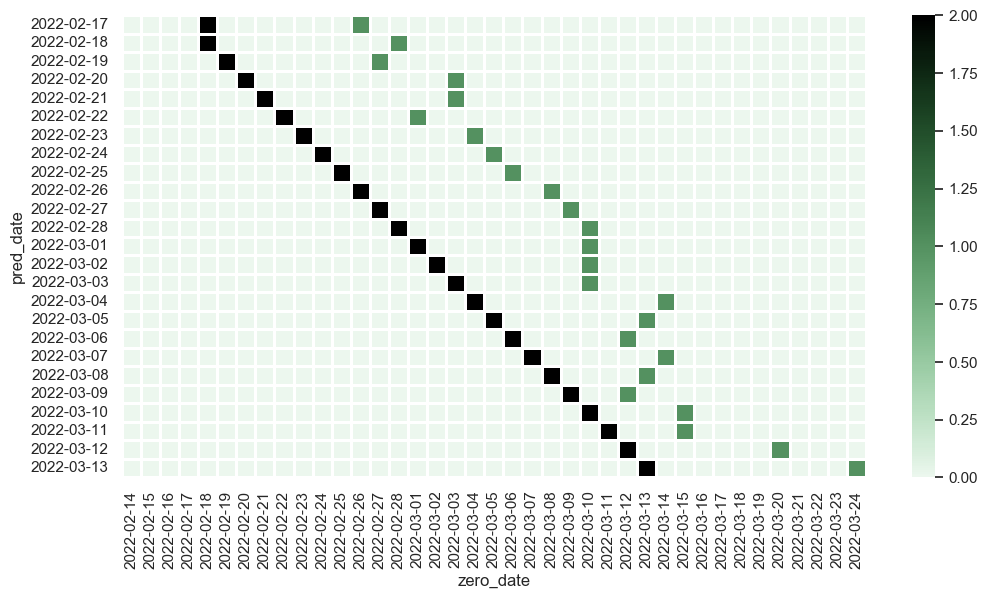

In [45]:
heat_map_df_warn = pd.DataFrame(
    warning_pred_list, columns=["pred_date", "zero_date", "flag"]
)
heat_map_df_warn["pred_date"] = heat_map_df_warn["pred_date"].dt.date
heat_map_df_warn["zero_date"] = heat_map_df_warn["zero_date"].dt.date

sns.heatmap(
    pd.pivot_table(
        heat_map_df_warn,
        index="pred_date",
        columns="zero_date",
        values="flag",
        aggfunc="max",
        fill_value=0,
    ),
    cmap=sns.cubehelix_palette(
        start=2, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True
    ),
    center=1.0,
    linewidths=1,
)

#### Lockdown

In [46]:
warning_pred_list = []
for _pred_date in data_modeling.date.iloc[28:-7]:
    print(_pred_date)
    growth_flag, turning_point, stop_point, seer_ser = covid19_seer(
        data_modeling.loc[data_modeling.date <= _pred_date].total_affected.values,
        "LOCKDOWN",
        theta_city,
        five_day_filter=15,
        lock_down_hard_thresh=data_modeling.loc[
            data_modeling.date <= _pred_date
        ].total_affected.values.max()
        + 1,
    )
    if turning_point is not None:
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(turning_point)),
                2,
            ]
        )
    else:
        turning_point = 5
    for _p in range(turning_point):
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(_p)),
                0,
            ]
        )

    if stop_point is not None:
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(stop_point)),
                1,
            ]
        )
    else:
        stop_point = 5
    for _p in range(stop_point):
        warning_pred_list.append(
            [
                _pred_date,
                data_modeling.date.iloc[0] + dtt.timedelta(days=int(_p)),
                0,
            ]
        )

2022-03-14 00:00:00
fitted theta: [0.50196358 1.00739521 1.93765238]
None
2022-03-15 00:00:00
fitted theta: [0.57482142 1.01626032 1.66754655]
None
2022-03-16 00:00:00
fitted theta: [0.56545766 1.01370653 1.68255941]
None
2022-03-17 00:00:00
fitted theta: [0.57384796 1.01411732 1.67292784]
None
2022-03-18 00:00:00
fitted theta: [0.58092725 1.01449092 1.66255229]
None
2022-03-19 00:00:00
fitted theta: [0.58269736 1.01409904 1.65292839]
None
2022-03-20 00:00:00
fitted theta: [0.58845968 1.01536579 1.64392072]
None
2022-03-21 00:00:00
fitted theta: [0.58613758 1.01398827 1.63884767]
None
2022-03-22 00:00:00
fitted theta: [0.59174544 1.01556626 1.63791687]
None
2022-03-23 00:00:00
fitted theta: [0.58962786 1.01400502 1.63758147]
None
2022-03-24 00:00:00
fitted theta: [0.58410936 1.01079554 1.63764554]
None
2022-03-25 00:00:00
fitted theta: [0.58364157 1.01045793 1.64064724]
None
2022-03-26 00:00:00
fitted theta: [0.58037628 1.00891755 1.64291531]
None
2022-03-27 00:00:00
fitted theta: [0.5

<AxesSubplot:xlabel='zero_date', ylabel='pred_date'>

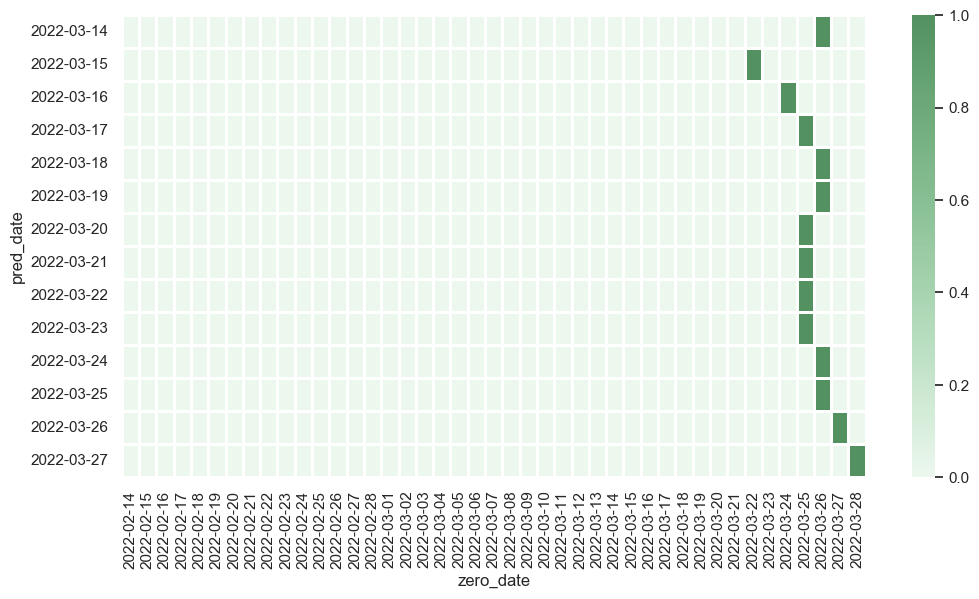

In [47]:
heat_map_df_lock = pd.DataFrame(
    warning_pred_list, columns=["pred_date", "zero_date", "flag"]
)
heat_map_df_lock["pred_date"] = heat_map_df_lock["pred_date"].dt.date
heat_map_df_lock["zero_date"] = heat_map_df_lock["zero_date"].dt.date

sns.heatmap(
    pd.pivot_table(
        heat_map_df_lock,
        index="pred_date",
        columns="zero_date",
        values="flag",
        aggfunc="max",
        fill_value=0,
    ),
    cmap=sns.cubehelix_palette(
        start=2, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True
    ),
    center=1.0,
    linewidths=1,
)

#### Combo

<AxesSubplot:xlabel='zero_date', ylabel='pred_date'>

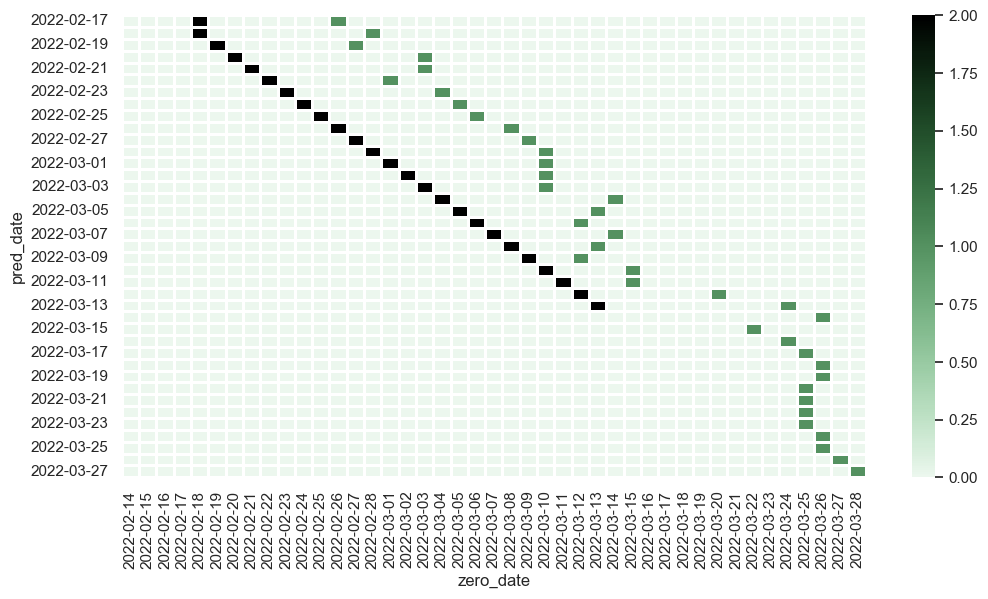

In [48]:
sns.heatmap(
    pd.pivot_table(
        pd.concat([heat_map_df_warn, heat_map_df_lock], axis=0),
        index="pred_date",
        columns="zero_date",
        values="flag",
        aggfunc="max",
        fill_value=0,
    ),
    cmap=sns.cubehelix_palette(
        start=2, rot=0, dark=0, light=0.95, reverse=False, as_cmap=True
    ),
    center=1.0,
    linewidths=1,
)

# Application on GZ

In [49]:
data_gz = pd.read_csv(
    "/Users/chenzhou/Documents/Everything/python/COVID19/data/covid19_guangzhou_221123.csv",
    dtype={
        "confirmed": pd.Int64Dtype(),
        "transfer": pd.Int64Dtype(),
        "asymptomatic": pd.Int64Dtype(),
    },
    parse_dates=["date"],
)
data_gz.fillna(0, inplace=True)
data_gz["total_add"] = data_gz.confirmed + data_gz.asymptomatic

In [50]:
data_gz

,date,confirmed,asymptomatic,transfer,total_add
0,2022-09-18,0,1,0,1
1,2022-09-19,0,0,0,0
2,2022-09-20,0,1,0,1
3,2022-09-21,0,2,0,2
4,2022-09-22,1,4,0,5
5,2022-09-23,1,0,3,1
6,2022-09-24,3,0,2,3
7,2022-09-25,2,0,0,2
8,2022-09-26,2,1,0,3
9,2022-09-27,0,1,0,1


In [51]:
data_modeling = (
    data_gz.loc[data_gz.date >= "2022-10-15"]
    .sort_values(["date"])
    .reset_index(drop=True)
)
shifting = 0
data_modeling.fillna(0.0, inplace=True)
data_modeling["total_affected"] = data_modeling.total_add.cumsum() + shifting
data_modeling

,date,confirmed,asymptomatic,transfer,total_add,total_affected
0,2022-10-15,20,16,0,36,36
1,2022-10-16,3,27,0,30,66
2,2022-10-17,16,43,0,59,125
3,2022-10-18,21,31,1,52,177
4,2022-10-19,6,44,0,50,227
5,2022-10-20,10,46,0,56,283
6,2022-10-21,12,46,0,58,341
7,2022-10-22,18,39,0,57,398
8,2022-10-23,16,53,0,69,467
9,2022-10-24,22,43,0,65,532


<AxesSubplot:xlabel='date', ylabel='total_affected'>

<AxesSubplot:xlabel='date', ylabel='total_affected'>

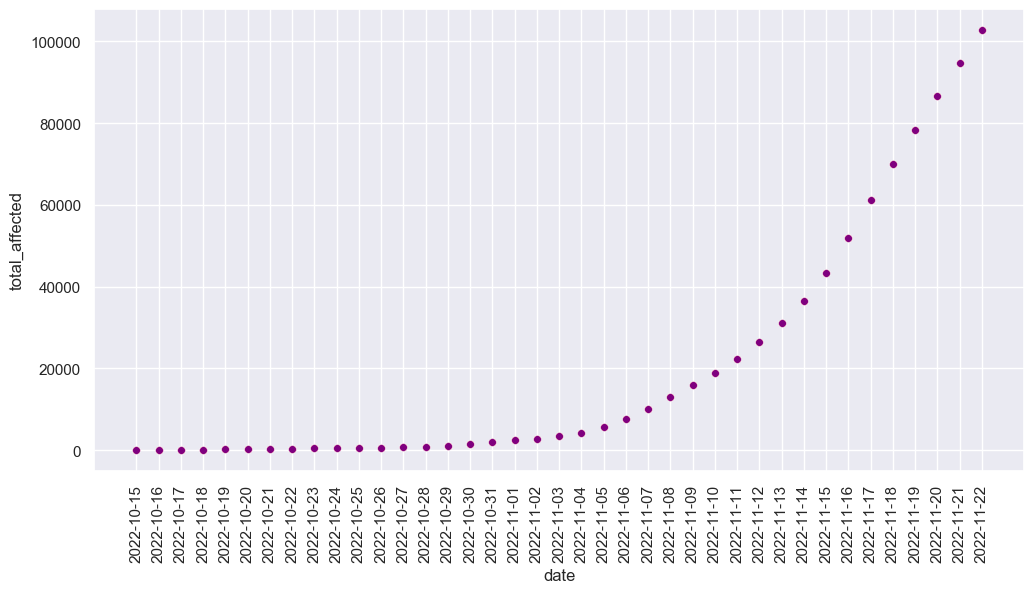

In [52]:
gt = data_modeling.iloc[:]
ser = gt.iloc[:]
sns.scatterplot(x=gt.date, y=gt.total_affected, alpha=1.0, color="blue", s=32)
sns.scatterplot(x=ser.date, y=ser.total_affected, alpha=0.5, color="red", s=32)
_ = plt.xticks(gt.date, rotation=90)

In [53]:
growth_flag, turning_point, stop_point, seer_ser = covid19_seer(
    ser.total_affected.values, "LOCKDOWN", theta_city
)

fitted theta: [0.58460192 1.01168173 1.66781277]
None


inter 0: Theta: [0.59895091 1.00398787 1.70990562] Loss: 14181.400801583175
inter 1: Theta: [0.59890231 1.00397601 1.70981224] Loss: 14186.257277672401
inter 2: Theta: [0.59885418 1.00396444 1.70971983] Loss: 14191.109240138523
inter 3: Theta: [0.59880653 1.00395313 1.7096284 ] Loss: 14195.955745726598
inter 4: Theta: [0.59875935 1.00394209 1.70953792] Loss: 14200.795884578427
inter 5: Theta: [0.59871263 1.0039313  1.70944841] Loss: 14205.628779241792
inter 6: Theta: [0.59866637 1.00392076 1.70935984] Loss: 14210.453583710518
inter 7: Theta: [0.59862056 1.00391046 1.70927221] Loss: 14215.269482494827
inter 8: Theta: [0.59857521 1.00390041 1.7091855 ] Loss: 14220.075689720328
inter 9: Theta: [0.5985303  1.00389058 1.70909972] Loss: 14224.87144825534
inter 10: Theta: [0.59848583 1.00388098 1.70901485] Loss: 14229.656028864934
inter 11: Theta: [0.5984418  1.00387161 1.70893088] Loss: 14234.428729390962
inter 12: Theta: [0.5983982  1.00386245 1.70884781] Loss: 14239.188873957246
inter 13: 

array([0.599, 1.004, 1.71 ])

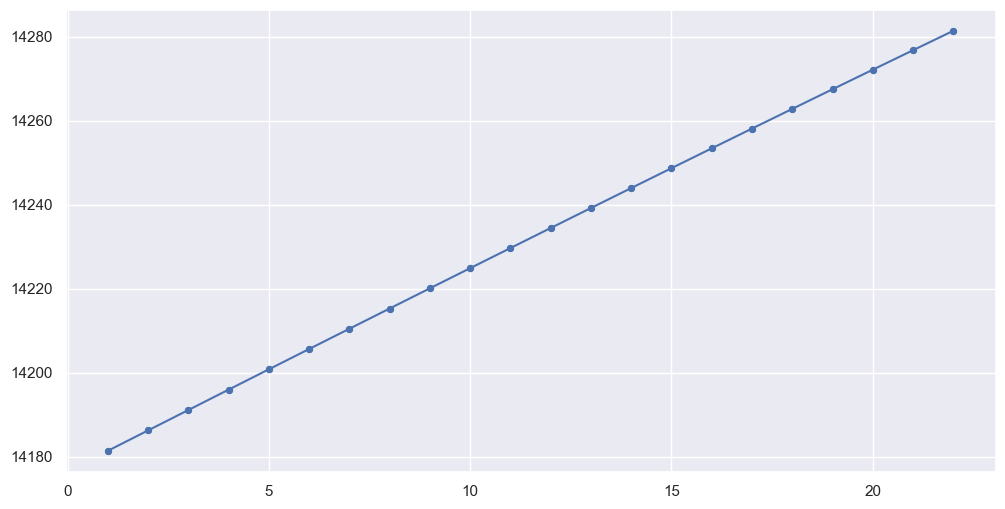

In [54]:
kappa_init, mu_init, tau_init = [0.599, 1.004, 1.71]

theta_opt, losses, fitted_opt, bs_funcs = model_theta_global_opt(
    ser.total_affected.values,
    kappa_init=kappa_init,
    mu_init=mu_init,
    tau_init=tau_init,
    bs_interp_prop=0.5,
    interg_interp_prop=200.0,
    labd=5.0,
    bs_lr_schedule=(int(4e2), 0.02, 0.999),
    theta_lr_schedule=(int(5e2), 0.01, 0.99),
    early_stop_ratio=[2.0, 0.99999],
    early_stop_steps=20,
    show_process="outer",
    ser_loss_expansion=0.5,
)
theta_opt

<AxesSubplot:>

<AxesSubplot:>

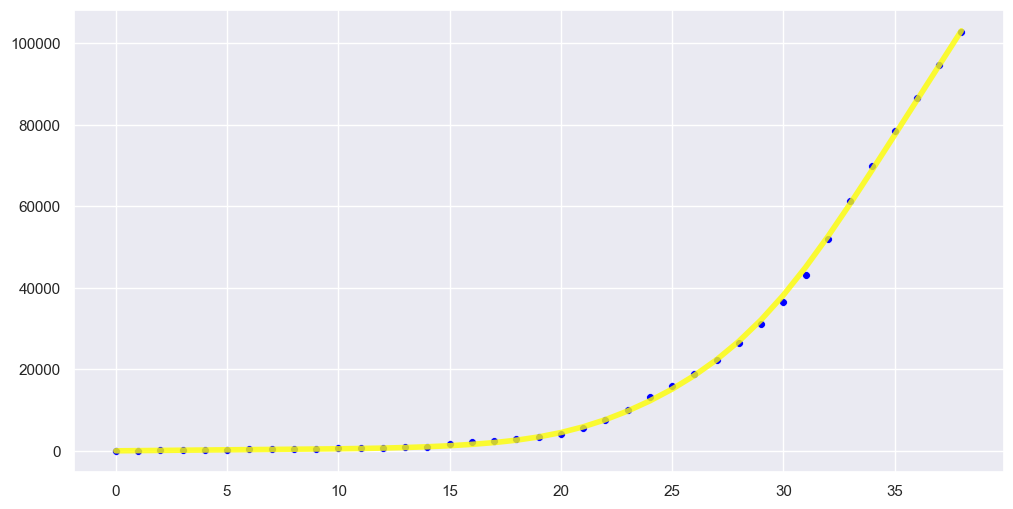

In [55]:
sns.scatterplot(
    x=range(len(ser.total_affected.values)),
    y=ser.total_affected.values,
    alpha=1.0,
    color="blue",
    s=32,
)
sns.lineplot(
    x=range(len(ser.total_affected.values)),
    y=revise_ser(fitted_opt),
    alpha=0.8,
    color="yellow",
    linewidth=4,
)

In [56]:
print("kappa: {} mu: {} tau :{}".format(theta_opt[0], theta_opt[1], theta_opt[2]))

kappa: 0.599 mu: 1.004 tau :1.71


In [57]:
theta_opt_adj = theta_opt  # [0.599, 1.00, 1.71]
theta_opt_adj
pred_len = 30
pred_interp = 10
pred_prev_len = 2
use_gt = 0
fitted_ser = revise_ser(
    np.concatenate([fitted_opt[:-use_gt], ser.total_affected.values[-use_gt:]])
)
pred_ser_combo = pred_ser(
    fitted_ser, pred_len, pred_interp, pred_prev_len, theta_opt_adj
)
pred_series = pred_ser_combo[pred_interp * pred_prev_len :][::pred_interp]
pred_series_upper = revise_ser(pred_series, intercept=pred_series[0])

array([0.599, 1.004, 1.71 ])

In [58]:
theta_opt_adj = [0.599, 1.008, 1.71]
theta_opt_adj
pred_len = 30
pred_interp = 10
pred_prev_len = 2
use_gt = 0
fitted_ser = revise_ser(
    np.concatenate([fitted_opt[:-use_gt], ser.total_affected.values[-use_gt:]])
)
pred_ser_combo = pred_ser(
    fitted_ser, pred_len, pred_interp, pred_prev_len, theta_opt_adj
)
pred_series = pred_ser_combo[pred_interp * pred_prev_len :][::pred_interp]
pred_series_lower = revise_ser(pred_series, intercept=pred_series[0])

[0.599, 1.008, 1.71]

In [59]:
theta_opt_adj = [0.599, 1.006, 1.71]
theta_opt_adj
pred_len = 30
pred_interp = 10
pred_prev_len = 2
use_gt = 0
fitted_ser = revise_ser(
    np.concatenate([fitted_opt[:-use_gt], ser.total_affected.values[-use_gt:]])
)
pred_ser_combo = pred_ser(
    fitted_ser, pred_len, pred_interp, pred_prev_len, theta_opt_adj
)
pred_series = pred_ser_combo[pred_interp * pred_prev_len :][::pred_interp]
pred_series_mean = revise_ser(pred_series, intercept=pred_series[0])

[0.599, 1.006, 1.71]

In [60]:
pred_x_range = pd.date_range("2022-11-22", "2022-12-22", freq="D")

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

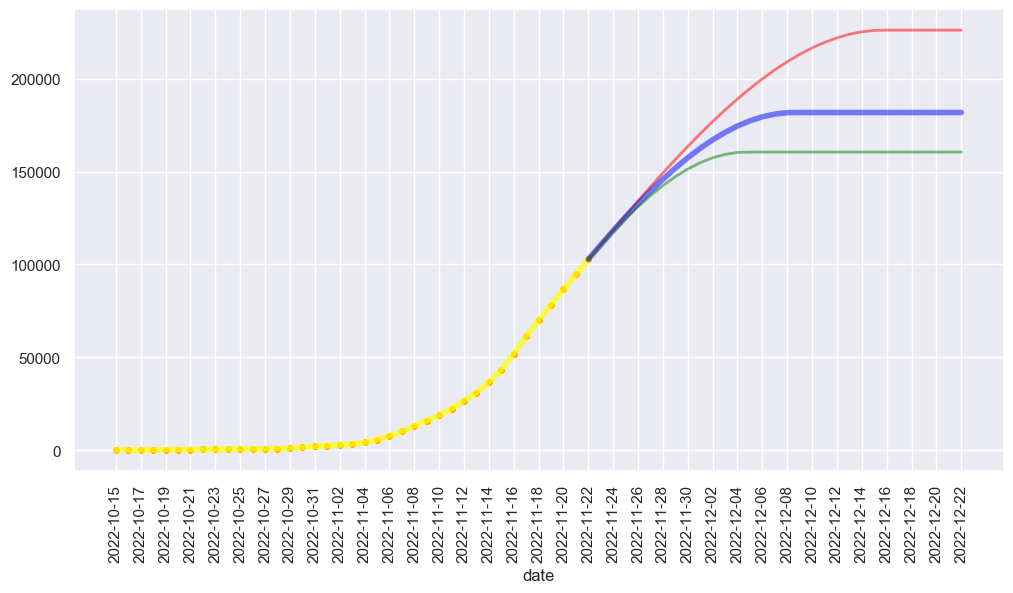

In [61]:
sns.lineplot(x=ser.date, y=fitted_ser, alpha=0.7, color="yellow", linewidth=4)

sns.scatterplot(
    x=ser.date, y=ser.total_affected.values, alpha=1.0, color="orange", s=32
)

sns.lineplot(
    x=pred_x_range,
    y=pred_series_upper,
    alpha=0.5,
    color="red",
    linewidth=2,
)

sns.lineplot(
    x=pred_x_range,
    y=pred_series_mean,
    alpha=0.5,
    color="blue",
    linewidth=4,
)

sns.lineplot(
    x=pred_x_range,
    y=pred_series_lower,
    alpha=0.5,
    color="green",
    linewidth=2,
)

_ = plt.xticks(pd.date_range("2022-10-15", "2022-12-22", freq="2D"), rotation=90)